In [2]:
import collections
import random
import os
import struct

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Define simple iterator to read samples.

In [2]:
def iterate(buffer):
    head_format = '<I3H'
    head_size = struct.calcsize(head_format)

    while True:
        head = buffer.read(head_size)
        if not head:
            break
        _, tag, width, height = struct.unpack(head_format, head)
        image = np.frombuffer(buffer.read(width * height), dtype=np.uint8)
        
        yield image.reshape(height, width), tag

Collect simple statiscs.

In [3]:
stat = collections.defaultdict(int)

for _, tag in iterate(open('1.0train-gb1.gnt', 'rb')):
    stat[tag] += 1

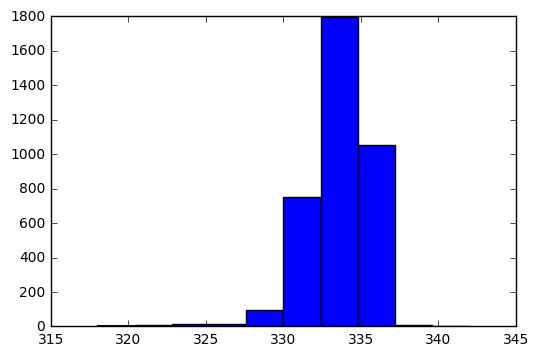

In [4]:
plt.hist(list(stat.values()));

Select classes for competion.

In [5]:
tags = list(stat.keys())
tags.sort()
tags = set(tags[-500:])

In [6]:
train = []

for img, tag in iterate(open('1.0train-gb1.gnt', 'rb')):
    if tag in tags:
        train.append([img, tag])

In [7]:
train = np.array(train)

In [8]:
np.save('train.npy', train)
del train

In [9]:
test = []
labels = []

for img, tag in iterate(open('1.0test-gb1.gnt', 'rb')):
    if tag in tags:
        test.append(img)
        labels.append(tag)
        
        
test = np.array(test)

In [10]:
np.save('test.npy', test)
del test

In [11]:
with open('labels.csv', 'w') as f:
    print('Id,Category', file=f)
    for i, label in enumerate(labels, 1):
        print('{},{}'.format(i, label), file=f)

In [15]:
tag_list = list(tags)

with open('submission_example.csv', 'w') as f:
    print('Id,Category', file=f)
    for i in range(1, len(labels) + 1):
        print('{},{}'.format(i, random.choice(tag_list)), file=f)

In [1]:
width, height = 4, 4

fig = plt.figure(figsize=(2 * width, 2 * height))
for sample_n in range(1, width * height + 1):
    ax = fig.add_subplot(height, width, sample_n)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(process(test[sample_n]), cmap="gray")

NameError: name 'plt' is not defined